<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px; text-align:center'>Conjoint Analysis (Choice Modeling) – Work Book</h1>
</div>

__<p style='text-align:center'>Copyright (©) Machine Learning Plus. All Rights Reserved.</p>__

# SECTION 2: Choice Modeling


## 1. Choice Modeling Methodology

ChoiceModelR is an R package designed for estimating and analyzing choice models, particularly focusing on discrete choice experiments (DCEs) and conjoint analysis. These models are used to understand how individuals make decisions among a set of alternatives and to estimate the relative importance of different attributes in those decisions.

#### Methodology

1. **Discrete Choice Models**: These models predict the choice that an individual will make from a set of alternatives. They assume that the __utility (or satisfaction) derived from each alternative can be modeled as a function of its attributes__.

2. **Random Utility Theory**: The core idea is that the utility $ U_{ij} $ of individual $ i $ choosing alternative $ j $ can be decomposed into a deterministic part $ V_{ij} $ (observable and based on attributes) and a random part $ \epsilon_{ij} $ (unobservable factors).

   $
   U_{ij} = V_{ij} + \epsilon_{ij}
   $

3. **Logit Model**: A common specification within ChoiceModelR is the Multinomial Logit (MNL) model, where the probability that individual $ i $ chooses alternative $ j $ from a set of $ J $ alternatives is given by:

   $
   P_{ij} = \frac{e^{V_{ij}}}{\sum_{k=1}^{J} e^{V_{ik}}}
   $

4. **Hierarchical Bayes (HB) Estimation**: ChoiceModelR often employs HB estimation, which allows for individual-level parameter estimates by combining data across individuals with prior distributions. This approach accounts for heterogeneity in preferences. In short, each parameter estimate's distribution is computed, instead of a having a point estimate.

#### Interpreting the Results

1. **Coefficient Estimates**: The primary output of a choice model includes the estimated coefficients for each attribute level. These coefficients represent the relative importance or preference for each attribute level.

2. **Sign and Magnitude**:
   - **Positive Coefficient**: Indicates a positive preference or utility associated with the attribute level.
   - **Negative Coefficient**: Indicates a negative preference or utility.
   - **Magnitude**: Larger absolute values indicate stronger preferences (positive or negative).

3. **Relative Importance**: The relative importance of attributes can be derived by comparing the ranges of the coefficients for different attributes. Attributes with a larger range of coefficients are more important in the decision-making process.

4. **Part-Worth Utilities**: In conjoint analysis, part-worth utilities for each attribute level can be interpreted to understand how much value (utility) each level e5t choices under various scenarios.

6. **Model Fit**: Various statistics like Log-Likelihood, AIC (Akaike Information Criterion), and BIC (Bayesian Information Criterion) are used to assess the goodness-of-fit of the model. Lower values of AIC and BIC indicate a better-fitting model.

7. **Hierarchical Bayes Output**:
   - **Posterior Means**: Average preferences across the sample.
   - **Posterior Distributions**: Provide a measure of uncertainty around the f attributes, and predicted choice probabilities.

ChoiceModelR provides a robust framework for analyzing discrete choice data, allowing researchers to derive valuable insights into consumer preferences and decision-making processes.


## 2. Sample Data Simulation - code along

### 1: Define the Attributes and Levels
Let's assume a simple conjoint study for a smartphone with the following attributes and levels:

- Price: 300, 400, 500 (Dollars)
- Battery Life: 12 hours, 24 hours, 36 hours
- Camera Quality: 12 MP, 24 MP, 48 MP
- Brand: Brand A, Brand B, Brand C
  
### Step 2: Generate the Profiles
Each profile (product option) in the choice set is defined by a combination of attribute levels. For simplicity, let's assume we are presenting 3 profiles per choice set to the respondents.

### Step 3: Simulate the Respondent Data
We'll simulate responses from 100 respondents, each evaluating 10 choice sets. We will generate choices based on some hypothetical utility functions for each respondent.

__Install R Kernel to Jupyter lab:__

In Anaconda prompt / Terminal, activate your environment and run:

```
conda config --add channels r
conda install --yes r-irkernel
```

Ref: [Stackoverflow](https://stackoverflow.com/questions/57870575/install-and-run-r-kernel-for-jupyter-notebook)

If you face any issues, run `Choice_Model_R.R` file in RStudio, instead of running in jupyter lab.

In [6]:
# install.packages(c("ChoiceModelR", 'ggplot2'))
# install.packages(c("reshape2"))
# install.packages(c("ggplot2"))

In [1]:
# Load required library
library(ChoiceModelR)
# library(reshape2)
# library(ggplot2)

In [2]:
# Set seed for reproducibility
set.seed(123)

# Define the attributes and levels
price_levels <- c(300, 400, 500)
battery_levels <- c(12, 24, 36)
camera_levels <- c(12, 24, 48)
brand_levels <- c("Brand A", "Brand B", "Brand C")

# Number of respondents and choice sets
num_respondents <- 100
num_choice_sets <- 10
profiles_per_choice_set <- 3

# Generate all possible profiles
profiles <- expand.grid(Price = price_levels,
                        BatteryLife = battery_levels,
                        CameraQuality = camera_levels,
                        Brand = brand_levels)

head(profiles, 4)

Price,BatteryLife,CameraQuality,Brand
300,12,12,Brand A
400,12,12,Brand A
500,12,12,Brand A
300,24,12,Brand A


## 3. Generate responses - code along

We have `num_respondents=100` and number of attributes per response = 4.

In [3]:
# Function to generate a choice set: Pick 3 profiles, where profiles per choice set = 3
generate_choice_set <- function() {
  sample(1:nrow(profiles), profiles_per_choice_set)
}

# Function to calculate utility for given profile (simple linear model for demonstration)
calculate_utility <- function(profile, respondent_prefs) {
  sum(profile * respondent_prefs)
}

# Generate respondent preferences (random coefficients for simplicity)
respondent_prefs <- matrix(runif(num_respondents * 4, -1, 1), ncol = 4)
colnames(respondent_prefs) <- c("Price", "BatteryLife", "CameraQuality", "Brand")
head(respondent_prefs)

Price,BatteryLife,CameraQuality,Brand
-0.4248450,0.19997792,-0.52254795,0.56915053
0.5766103,-0.33435292,0.92471787,-0.98114019
-0.1820462,-0.02277393,0.20273145,0.55813177
0.7660348,0.90894765,0.03005945,0.45878130
0.8809346,-0.03419521,-0.19485332,0.26026371
-0.9088870,0.78070044,0.76049308,-0.03817834


__Generate the choice data__

Each respondent makes a selection (choice) 10 times (set by `num_choice_sets`).

For each selection, a given respondent is shown 3 profiles (set by `profiles_per_choice_set`). From those 3 profiles, respondent picks 1 he/she likes. Their choice is based on the utility score (satisfaction) for each profile he / she is shown.

Code Example:

__Step 1:__ Generate the choice set to be shown for the 1st time to 1st respondent.

In [4]:
choice_set_indices <- generate_choice_set()  # Generate 3 profiles (profiles_per_choice_set) per choice_set.
choice_set <- profiles[choice_set_indices, ]

# Ensure attributes are numeric for utility calculation
choice_set_numeric <- data.frame(
  Price = as.numeric(choice_set$Price),
  BatteryLife = as.numeric(choice_set$BatteryLife),
  CameraQuality = as.numeric(choice_set$CameraQuality),
  Brand = as.numeric(factor(choice_set$Brand, levels = brand_levels))
)

choice_set_numeric

Price,BatteryLife,CameraQuality,Brand
400,24,48,1
300,24,24,3
500,36,12,1


Check Choice indices chosen

In [5]:
choice_set_indices

[1] 23 67  9

__Step 2:__ Calculate the total utility scores for each profile shown to respondent 1 and show it.

In [8]:
utilities <- apply(choice_set_numeric, 1, function(x) calculate_utility(x, respondent_prefs[1, ]))
chosen_profile <- which.max(utilities)
print("Below is the utility score for each of the 3 profiles shown to 1st respondent:")
print(utilities)
print("Below is the chosen profile:")
print(chosen_profile)

[1] "Below is the utility score for each of the 3 profiles shown to 1st respondent:"
[1] -189.6517 -133.4877 -210.9247
[1] "Below is the chosen profile:"
[1] 2


__Step 3__: Make choice set data (profiles shown and selected) for 1 selection by a given customer.

In [15]:
data <- data.frame()

for (p in 1:profiles_per_choice_set) {
  data <- rbind(data, data.frame(
    ID = 1, #resp = respondent num,
    Set = 1, #cs = choice set num,
    Alt = p, # p = profile number
    Profile = choice_set_indices[p],
    Price = choice_set$Price[p],
    BatteryLife = choice_set$BatteryLife[p],
    CameraQuality = choice_set$CameraQuality[p],
    Brand = choice_set$Brand[p],
    Choice = ifelse(p == chosen_profile, 1, 0)
  ))
}

data

ID,Set,Alt,Profile,Price,BatteryLife,CameraQuality,Brand,Choice
1,1,1,23,400,24,48,Brand A,0
1,1,2,67,300,24,24,Brand C,1
1,1,3,9,500,36,12,Brand A,0


___Here is the Full Code___

For all respondents and all 10 selections per respondent. So, total number of records should be 100 * 10 * 3.

In [17]:
# Generate choice data
data <- data.frame()

for (resp in 1:num_respondents) {  # for each respondent
  for (cs in 1:num_choice_sets) {  # for as many choice_sets=10
    choice_set_indices <- generate_choice_set()  # Generate 3 profiles (profiles_per_choice_set) per choice_set.
    choice_set <- profiles[choice_set_indices, ]
    
    # Ensure attributes are numeric for utility calculation
    choice_set_numeric <- data.frame(
      Price = as.numeric(choice_set$Price),
      BatteryLife = as.numeric(choice_set$BatteryLife),
      CameraQuality = as.numeric(choice_set$CameraQuality),
      Brand = as.numeric(factor(choice_set$Brand, levels = brand_levels))
    )
    
    utilities <- apply(choice_set_numeric, 1, function(x) calculate_utility(x, respondent_prefs[resp, ]))
    chosen_profile <- which.max(utilities)
    
    for (p in 1:profiles_per_choice_set) {
      data <- rbind(data, data.frame(
        ID = resp,
        Set = cs,
        Alt = p,
        Profile = choice_set_indices[p],
        Price = choice_set$Price[p],
        BatteryLife = choice_set$BatteryLife[p],
        CameraQuality = choice_set$CameraQuality[p],
        Brand = choice_set$Brand[p],
        Choice = ifelse(p == chosen_profile, 1, 0)
      ))
    }
  }
}

# Convert necessary columns to factors
data$ID <- as.double(data$ID)
data$Set <- as.integer(data$Set)
data$Alt <- as.integer(data$Alt)
data$Profile <- as.factor(data$Profile)
data$Brand <- as.factor(data$Brand)

data = data[,!(colnames(data) %in% c("Profile"))]

# Transform the data so that the first record in a choice set contains the selected profile number (1,2 or 3).
No_of_Choices =3
choi <- data$Choice
choi <- matrix(choi, nrow(data)/No_of_Choices, No_of_Choices, byrow=T)

CHOI = NULL
for(c in 1:(nrow(choi))){
  task = c(which(choi[c,]==1), rep(0,No_of_Choices-1))
  CHOI = c(CHOI, task)
}

data$Choice <- CHOI

rm(list=(ls()[ls()!="data"]))

In [18]:
NROW(data)

[1] 3000

In [19]:
head(data, 100)

ID,Set,Alt,Price,BatteryLife,CameraQuality,Brand,Choice
1,1,1,300,36,12,Brand C,1
1,1,2,500,12,24,Brand B,0
1,1,3,300,24,12,Brand B,0
1,2,1,300,12,48,Brand C,3
1,2,2,500,36,12,Brand B,0
1,2,3,300,24,48,Brand A,0
1,3,1,400,36,24,Brand B,3
1,3,2,400,24,24,Brand B,0
1,3,3,300,36,24,Brand B,0
1,4,1,500,12,24,Brand B,2


## 4. Train the Conjoint Model         

### Fit the Conjoint Model Using ChoiceModelR

At the end of model estimation, the average of MCMC draws of unit-level model coefficients (Utilities) are written to RBetas.csv

Prepare inputs for the `choicemodelr` function: `mcmc`, `constraints`, `xcoding`.

_What is mcmc?_

> xcoding is a vector that specifies type of each variable 0 for categorical, 1 for continuous variable

_What is the constraints object?_

> Constraints is square matrix with dimensions equal to the number of levels of the attribute 
for continuous it will be 1X1 matrix (continuous variables are identified using xcoding)

_What is `R` and `use` in mcmc?_

> R = total number of iterations of the Markov chain Monte Carlo (MCMC chain) to be performed
use = the number of iterations to be used in parameter estimation


In [20]:
Data_Conjoint <- data
# USE choicemodelr TO ESTIMATE THE PARAMETERS OF THE CHOICE MODEL.
# FOR CONVERGENCE OF MCMC CHAIN, SET R = 4000 AND use = 2000.
mcmc = list(R = 5000, use = 250)

options = list(none=FALSE, save=TRUE, keep=5)
col_list <- c("Price", "BatteryLife", "CameraQuality", "Brand")

constraints <- c()
xcoding = c()   # xcoding is a vector that specifies type of each variable 0 for categorical, 1 for continuous variable

for (i in 1:length(col_list)) {  # for each attribute
  unique_values <- length(unique(Data_Conjoint[,col_list[i]]))  # number of unique values for an attribute
  
  if(unique_values <= 5){
    xcoding <- c(xcoding, 0)
    Data_Conjoint[,col_list[i]] <- as.integer(Data_Conjoint[,col_list[i]])      # put as integer
    unique_values <- length(unique(Data_Conjoint[,col_list[i]]))                # number of unique values for an attribute
    constraints[[i]] <- matrix(0, ncol = unique_values, nrow = unique_values)   # constrain matrix for the given attribute
  } else {
    xcoding <- c(xcoding, 1)
    constraints[[i]] <- matrix(-1, ncol = 1, nrow = 1, byrow = TRUE)
  }
}

__Train the choicemodel__

                    Logit Data                    
Attribute       Type         Levels
-----------------------------------
Attribute 1    Part Worth      3
Attribute 2    Part Worth      3
Attribute 3    Part Worth      3
Attribute 4    Part Worth      3

8 parameters to be estimated.

100 total units.
Average of 3 alternatives in each of 10 sets per unit.
1000 tasks in total.

Table of choice data pooled across units:
Choice  Count   Pct.
--------------------
   1    329    32.9%
   2    338    33.8%
   3    333    33.3%

      MCMC Inference for Hierarchical Logit       
Total Iterations:          5000
Draws used in estimation:  250
Units:                     100
Parameters per unit:       8
Constraints in effect.
Draws are to be saved.
Prior degrees of freedom:  5
Prior variance:            2

MCMC Iteration Beginning...
Iteration  Acceptance   RLH     Pct. Cert.   Avg. Var.   RMS     Time to End
      100  0.389        0.340   0.019        0.48        0.46    0:09  
      200  0.30

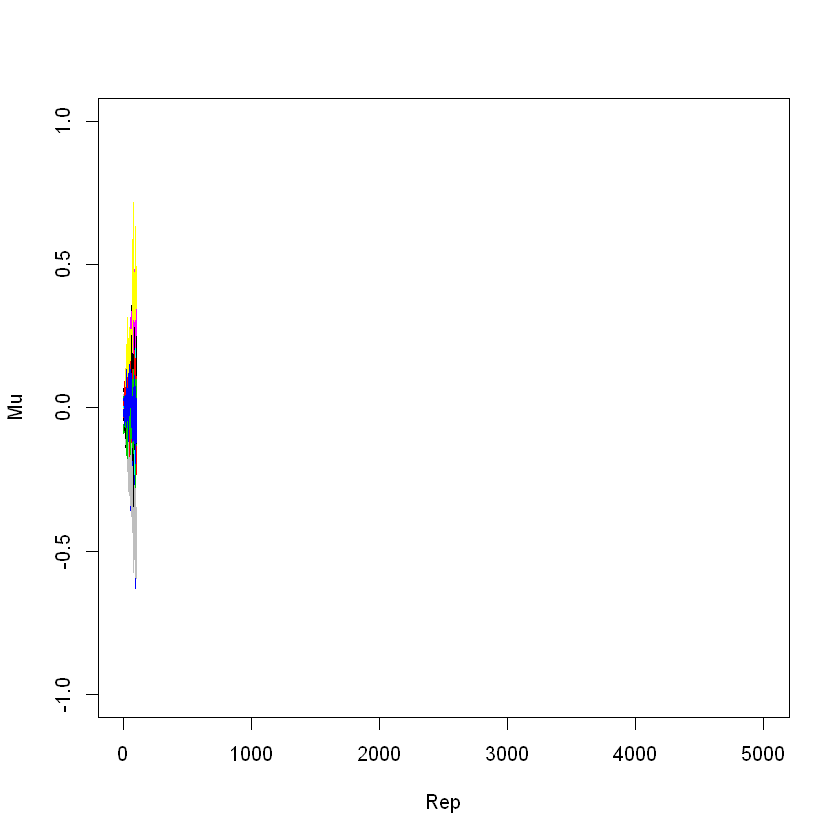

      500  0.307        0.347   0.038        1.89        1.57    0:07  
      600  0.308        0.346   0.035        1.93        1.63    0:07  
      700  0.305        0.348   0.039        1.89        1.64    0:06  


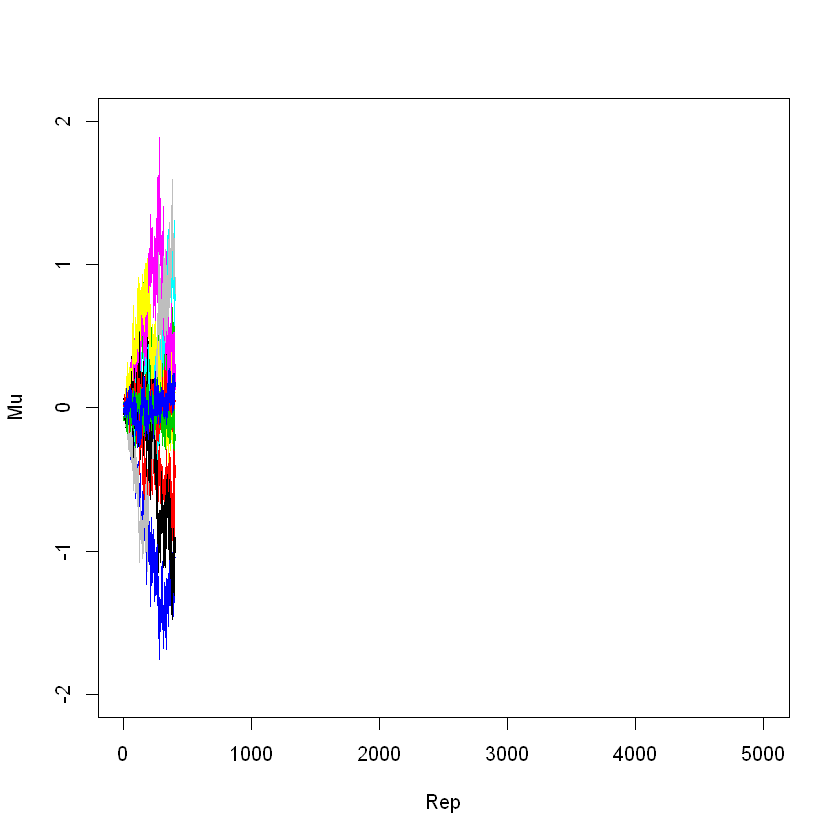

      800  0.301        0.347   0.037        1.84        1.67    0:07  
      900  0.301        0.347   0.037        1.46        1.64    0:06  
     1000  0.306        0.347   0.037        1.33        1.64    0:06  
     1100  0.303        0.347   0.037        1.49        1.75    0:06  


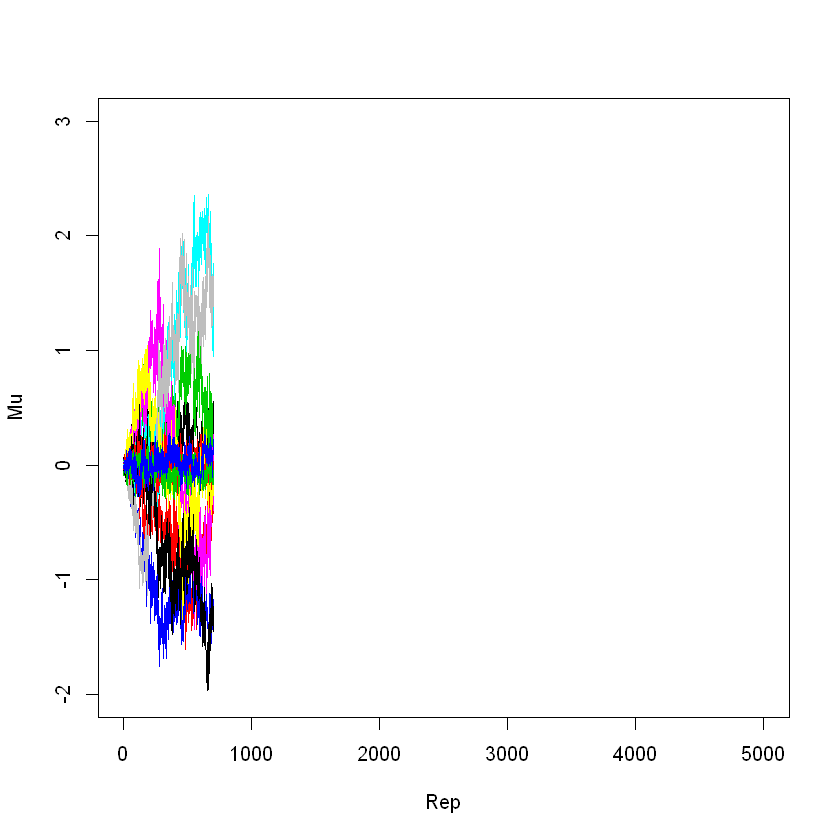

     1200  0.308        0.347   0.037        1.74        2.01    0:06  
     1300  0.313        0.347   0.035        2.04        2.15    0:06  


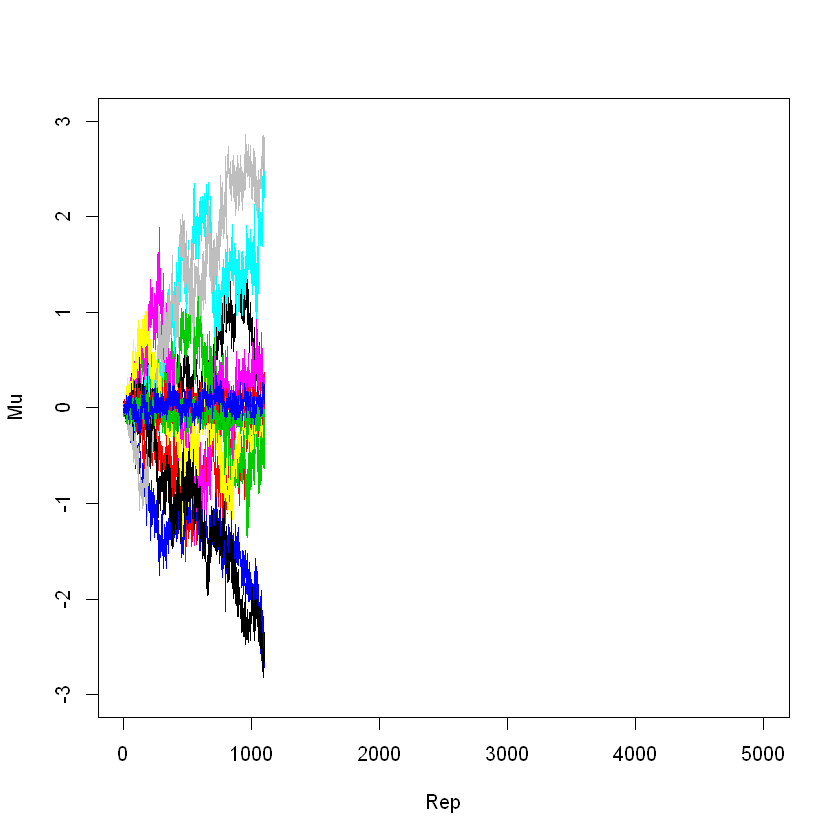

     1400  0.300        0.347   0.038        2.08        2.43    0:06  


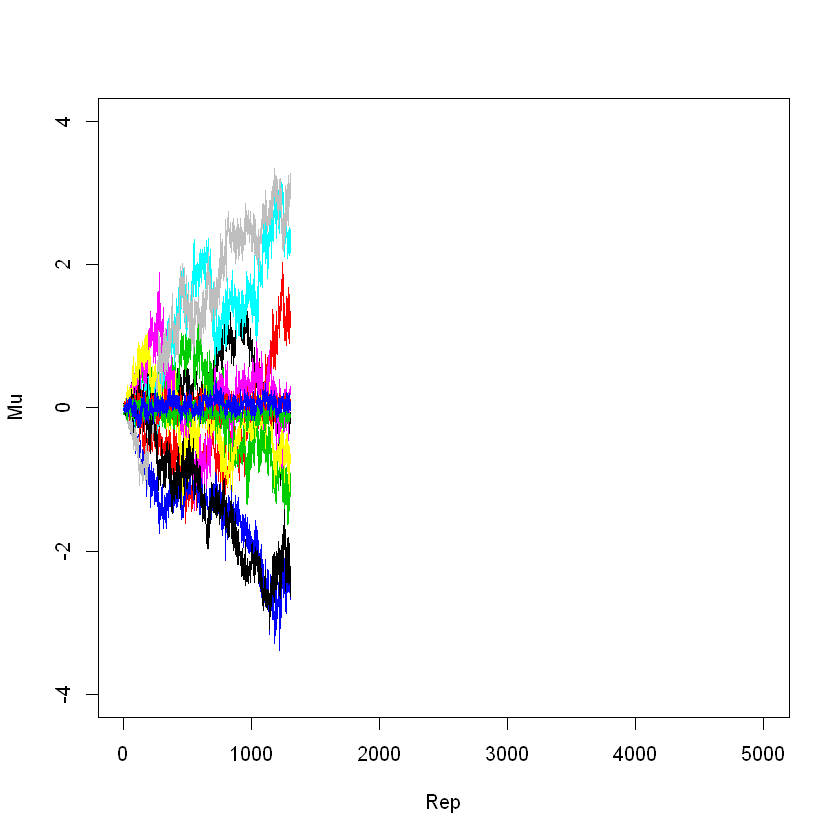

     1500  0.306        0.347   0.038        2.71        2.72    0:07  
     1600  0.292        0.346   0.034        3.60        2.96    0:06  
     1700  0.301        0.347   0.036        4.03        2.87    0:06  
     1800  0.299        0.347   0.038        4.62        2.93    0:06  
     1900  0.304        0.347   0.037        5.08        2.98    0:05  
     2000  0.303        0.347   0.036        4.16        2.92    0:05  
     2100  0.315        0.346   0.035        3.40        3.04    0:05  


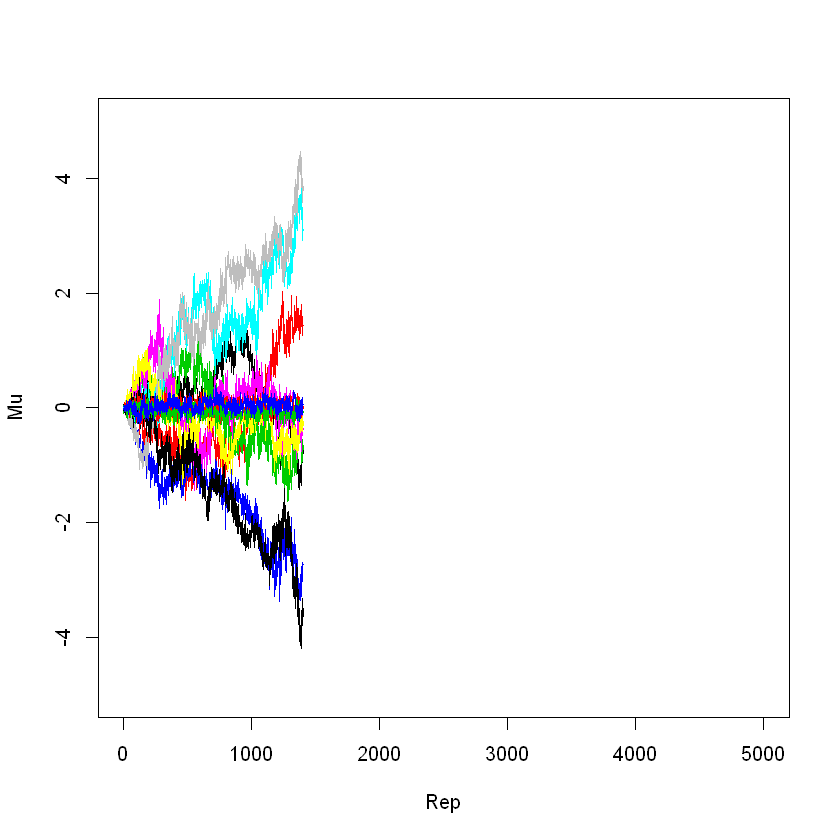

     2200  0.312        0.347   0.036        2.57        3.20    0:05  


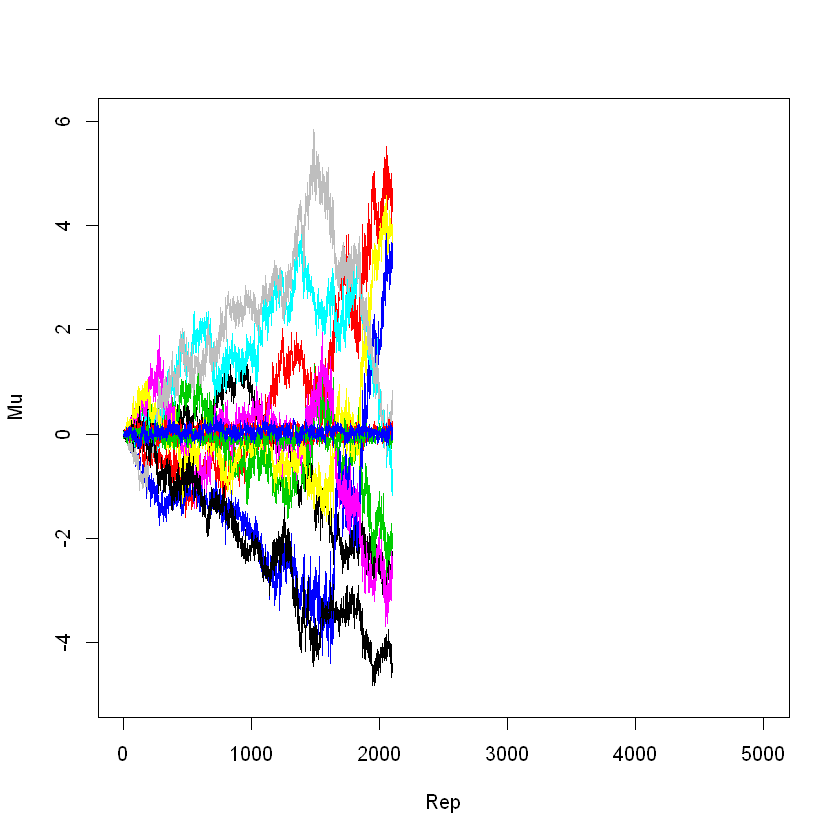

     2300  0.303        0.347   0.036        2.33        3.45    0:05  


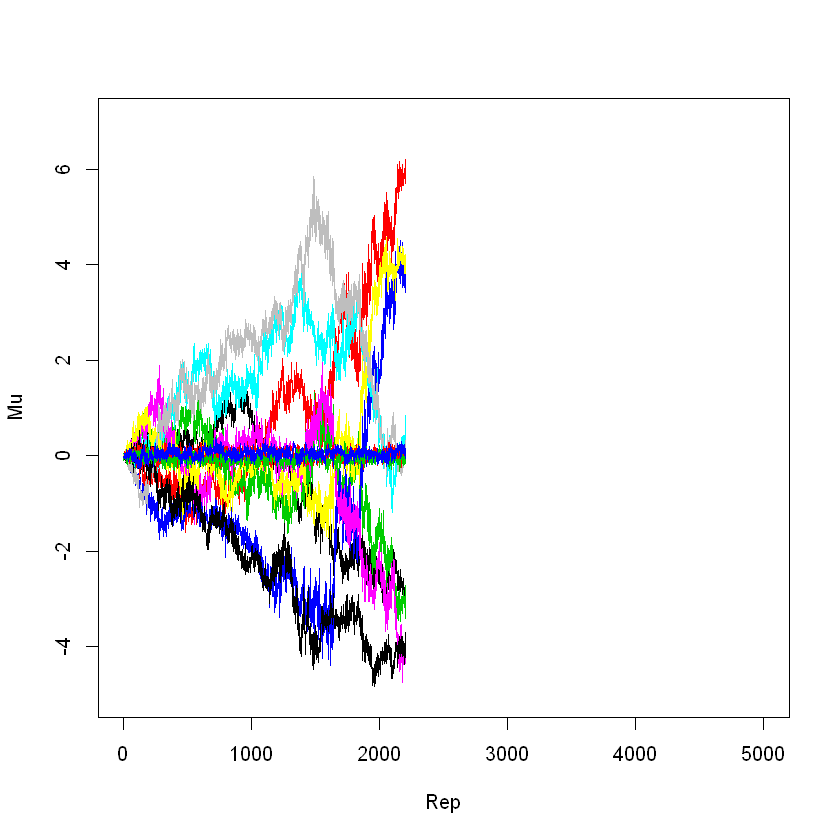

     2400  0.307        0.347   0.036        2.06        3.65    0:06  
     2500  0.304        0.346   0.034        1.65        3.74    0:05  


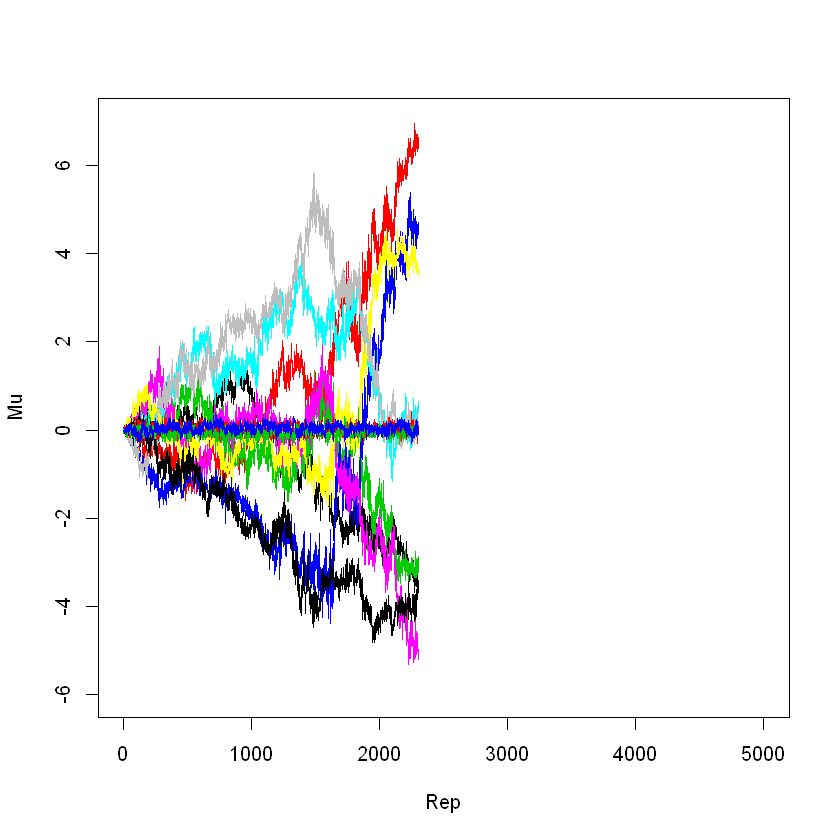

     2600  0.305        0.348   0.039        1.56        3.87    0:06  
     2700  0.308        0.347   0.036        1.58        3.91    0:05  
     2800  0.305        0.348   0.039        1.74        3.88    0:05  
     2900  0.310        0.347   0.036        2.19        3.90    0:05  
     3000  0.303        0.347   0.037        1.73        3.85    0:05  


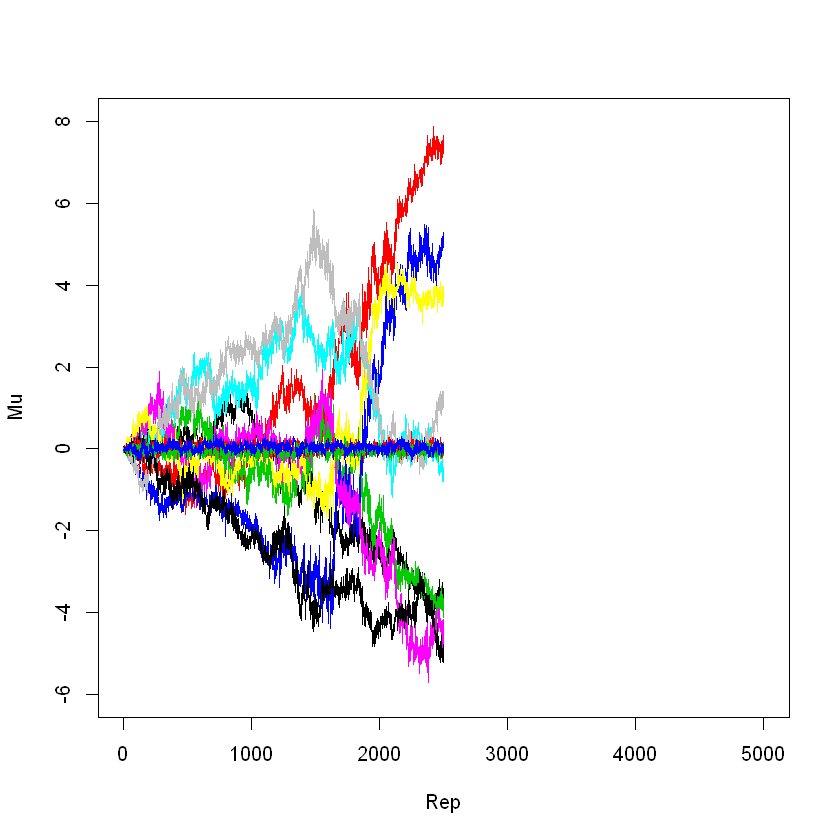

     3100  0.312        0.347   0.036        1.80        4.13    0:05  


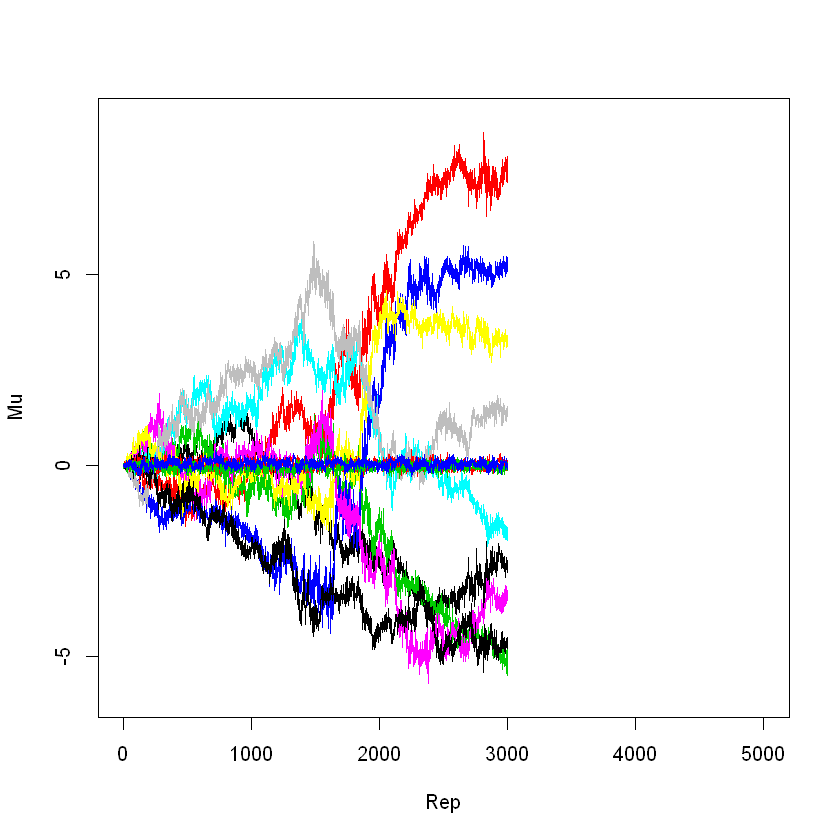

     3200  0.308        0.346   0.035        2.57        4.35    0:05  
     3300  0.305        0.347   0.035        2.84        4.44    0:04  
     3400  0.299        0.348   0.038        2.55        4.58    0:04  
     3500  0.307        0.347   0.037        2.26        4.57    0:04  
     3600  0.302        0.348   0.039        1.86        4.41    0:03  
     3700  0.308        0.347   0.037        1.82        4.42    0:03  
     3800  0.308        0.348   0.038        1.59        4.45    0:03  
     3900  0.294        0.348   0.038        1.41        4.54    0:03  
     4000  0.311        0.348   0.039        1.36        4.55    0:02  
     4100  0.304        0.348   0.038        1.97        4.65    0:02  


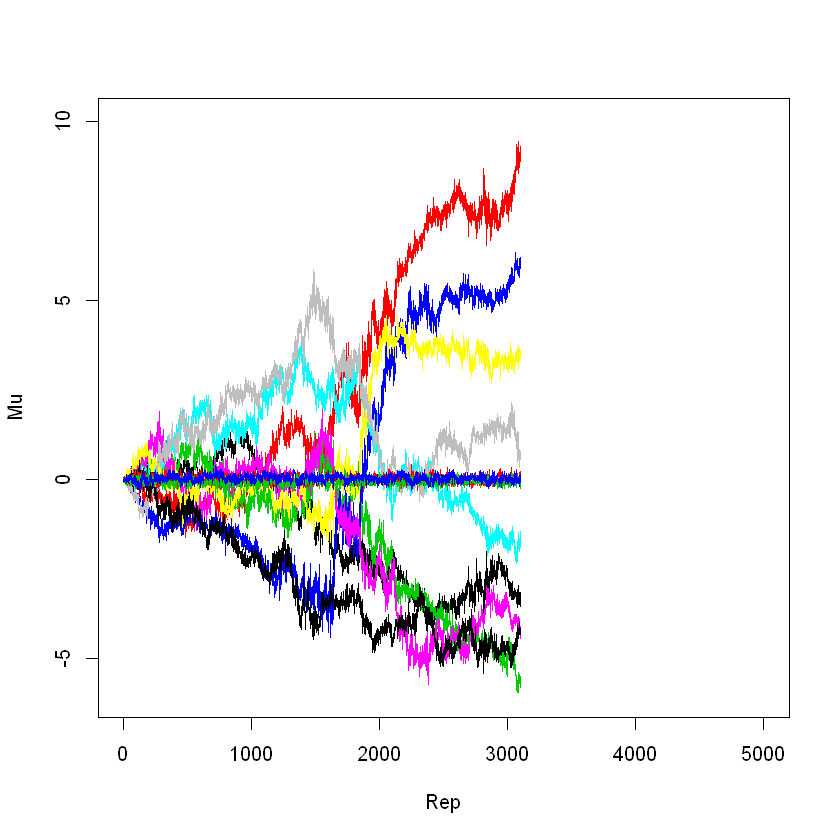

     4200  0.303        0.348   0.039        2.91        4.84    0:02  


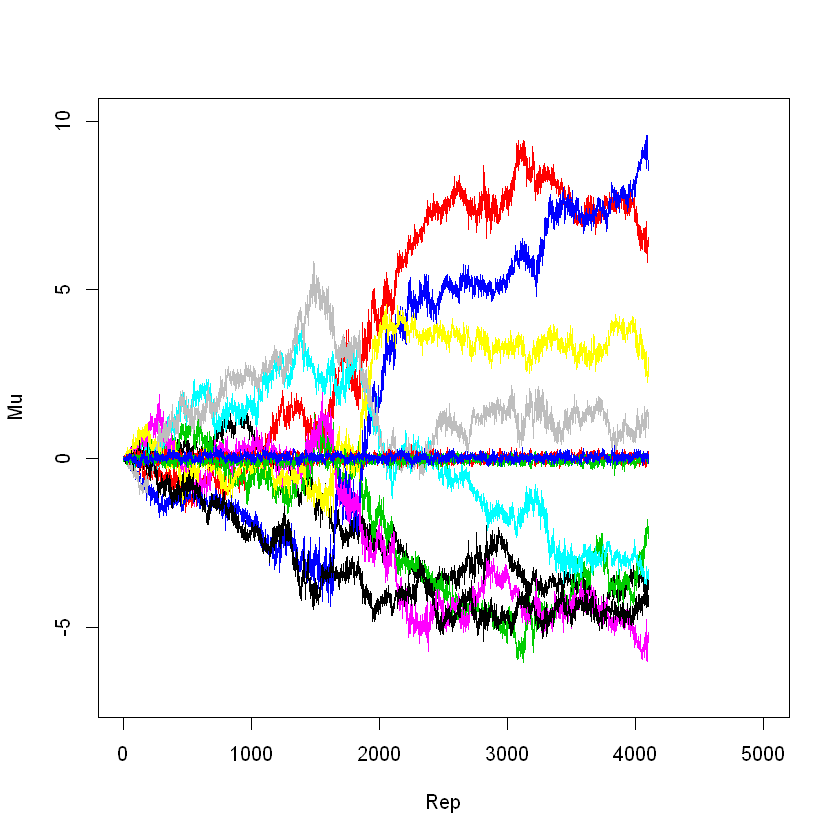

     4300  0.300        0.348   0.039        3.96        5.13    0:02  
     4400  0.306        0.346   0.035        3.30        5.04    0:02  
     4500  0.303        0.346   0.034        2.71        4.96    0:01  
     4600  0.303        0.347   0.036        2.66        5.04    0:01  
     4700  0.310        0.347   0.036        2.34        5.14    0:01  
     4800  0.301        0.346   0.034        2.11        5.04    0:00  
     4900  0.301        0.346   0.033        1.83        4.96    0:00  
     5000  0.308        0.345   0.032        1.67        5.03    0:00  


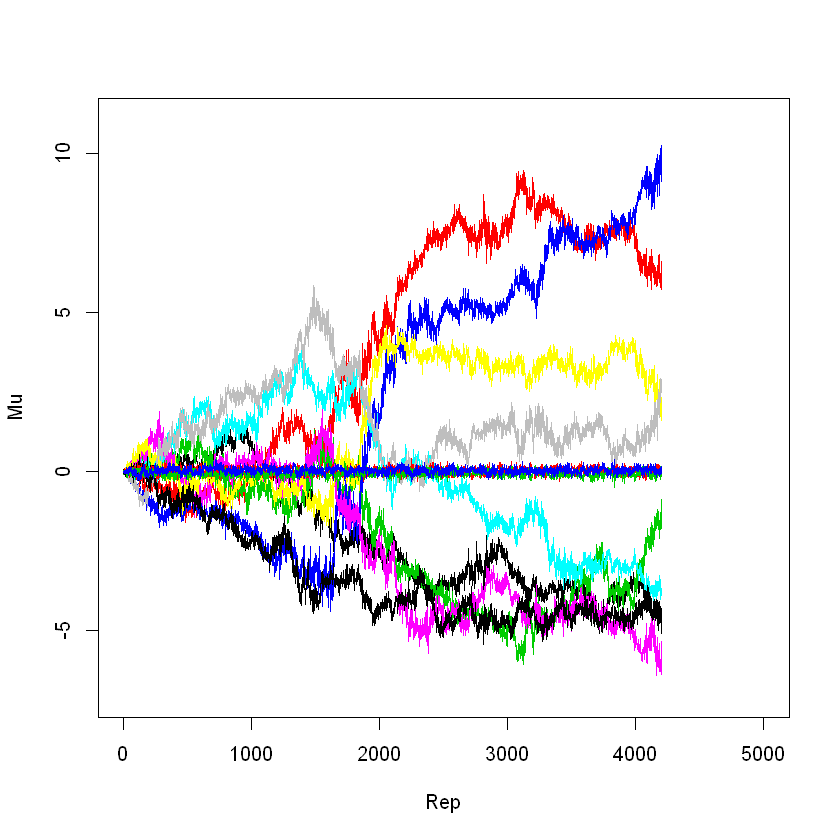


Total Time Elapsed: 0:12

Writing estimated unit-level betas to Rbetas.csv in the working directory

Writing RLH, the geometric mean of the likelihood of the choices made,

      across the choice sets of each unit to RLH.csv in the working directory



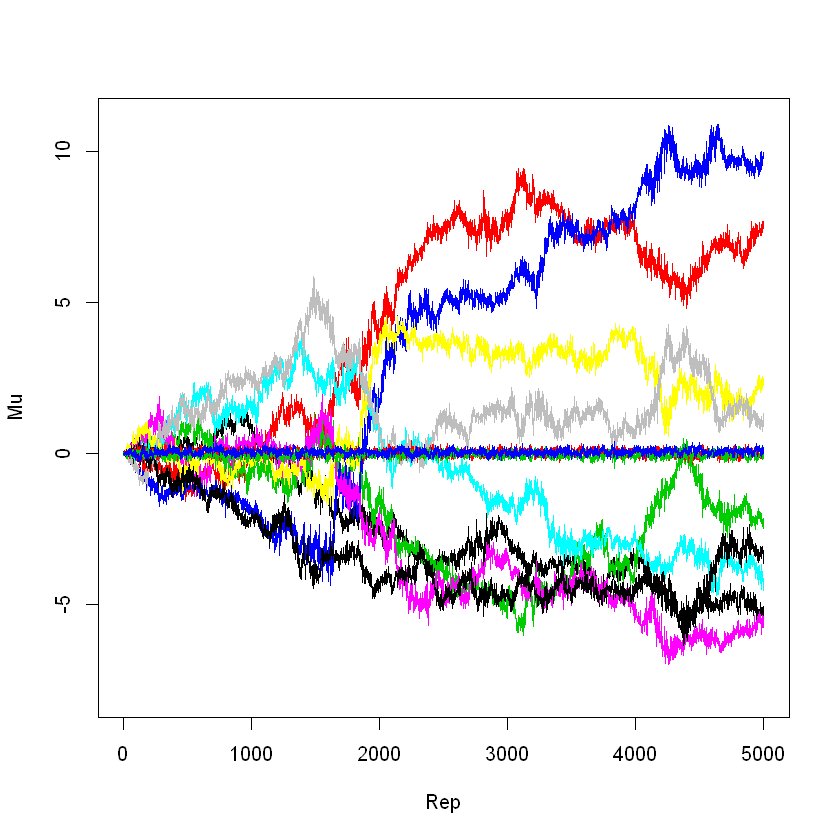

In [21]:
pth = "."

set.seed(111)
choice_model = choicemodelr(Data_Conjoint, xcoding, mcmc = mcmc, options = options,
                            constraints = constraints, directory= pth)

__How to interpret the above chart?__

If the lines are flat, then the model has converged. This is not really happening in our case, mainly because our data is not real/meaningful.

- x Axis is the number of iteration specified in "R = 5000"
- y Axis mu mean of model coefficients from the each mcmc iteration


The plot from the converged chart might look something like this:

<img src="converged_chart.jfif" width=500px>

## 5. Model Interpretation

__Is there a numeric way to know if the model converged?__

Yes, using RLH, which stands for 'R-use Likelihood'. 

_RLH_ is the geometric mean of the likelihood of the choices made across the choice sets. Good Model will have RLH close to __0.9__ in our case it is 0.34.

The RLH values are exported during model training to a file names `RLH.csv`.

```
Iteration  Acceptance   RLH     Pct. Cert.   Avg. Var.   RMS     Time to End
      100  0.389        0.340   0.019        0.48        0.46    0:09  
      200  0.306        0.345   0.031        0.95        0.90    0:07  
      300  0.304        0.346   0.033        1.26        1.13    0:07  
      400  0.306        0.346   0.035        1.47        1.31    0:07
```

### Estimated coefficients are saved in RBetas.csv

`RBetas.csv` and `RLH.csv` are created during the model training.

In [12]:
paste(pth, "RBetas_V2.csv", sep = "/")

[1] "./RBetas_V2.csv"

In [13]:
RBetas <- read.csv(paste(pth, "RBetas.csv", sep = "/"))

varlist <- c()
for(i in col_list){
  uniq_values = unlist(unique(data[i]))
  result <- paste(i, uniq_values, sep = "_")
  varlist <- c(varlist,result)
}
colnames(RBetas)[c(2:length(RBetas))] <- varlist

write.csv(RBetas, paste(pth, "RBetas_V2.csv", sep = "/"), row.names = F)

No id variables; using all as measure variables



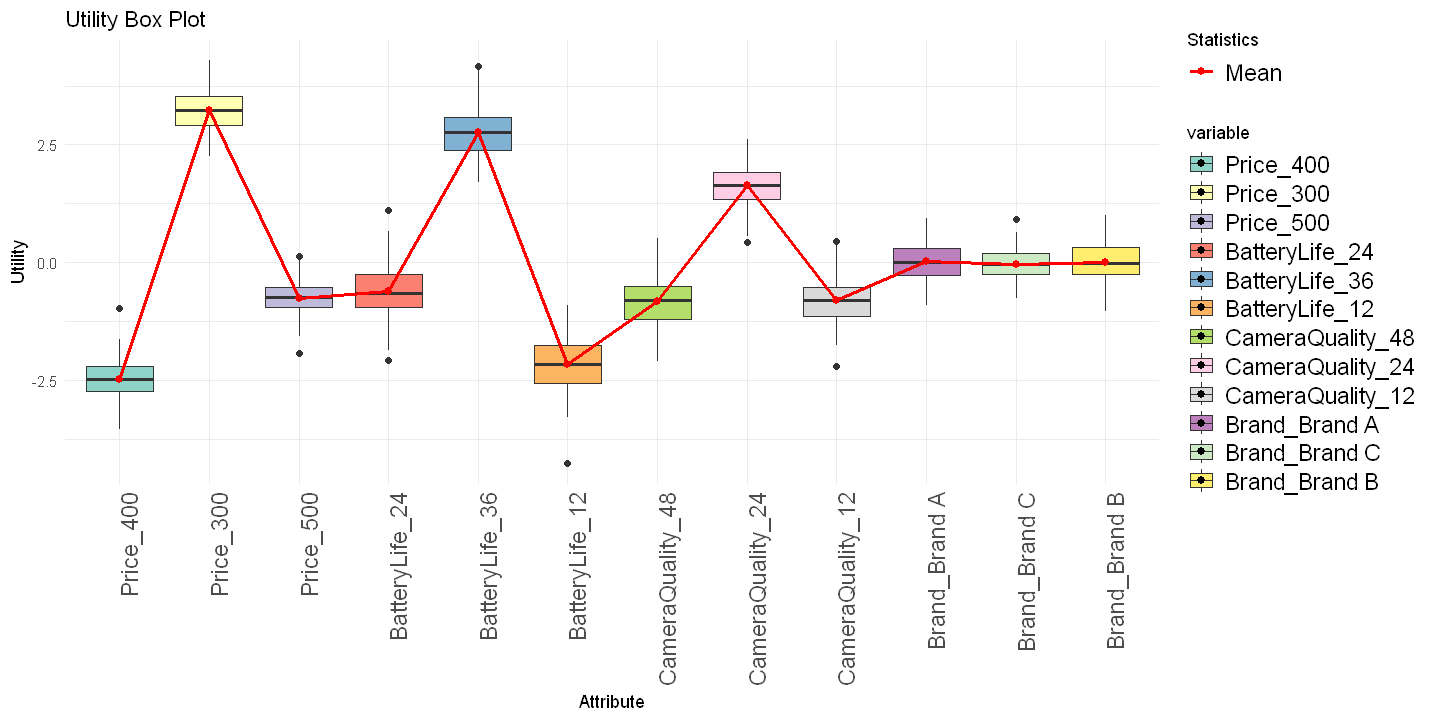

In [41]:
#------------------- Utility Box Plot ----------------------
data_long <- melt(RBetas[,-1])

p <- ggplot(data_long, aes(x = variable, y = value, fill = variable)) + 
  geom_boxplot() + 
  stat_summary(fun = mean, geom = "line", aes(group = 1, color = "Mean"), size = 1) +
  stat_summary(fun = mean, geom = "point", aes(color = "Mean"), size = 2) +
  labs(title = "Utility Box Plot",
       x = "Attribute",
       y = "Utility") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 14)) +
  theme(legend.text = element_text(size = 14)) +
  scale_fill_brewer(palette = "Set3") + # Add colors to the boxplot
  scale_color_manual(name = "Statistics", values = c("Mean" = "red"))

options(repr.plot.width = 12, repr.plot.height = 6)

print(p)

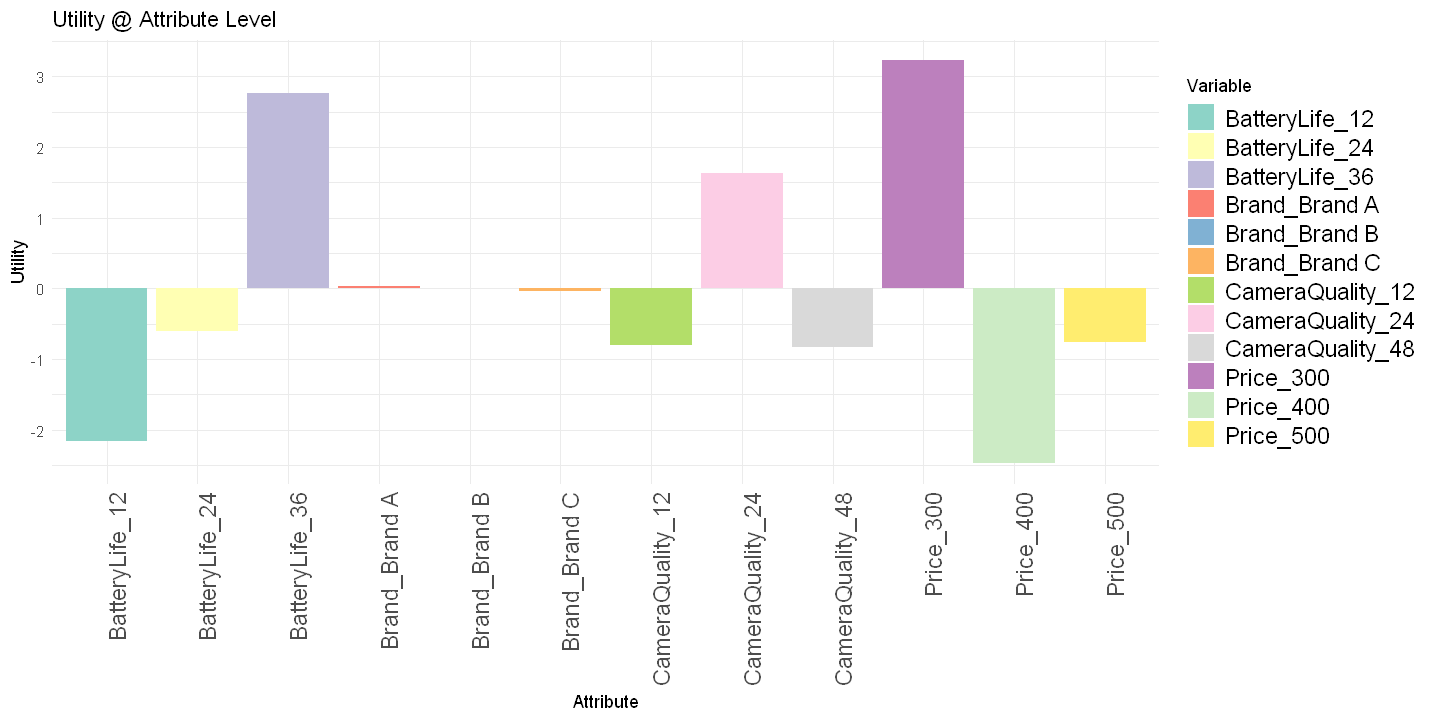

In [42]:
#------------------- Utility Bar Plot ------------------------
means <- colMeans(RBetas[,-1])

# Convert the means to a data frame
means_df <- data.frame(
  Variable = names(means),
  Mean = means
)

ggplot(means_df, aes(x = Variable, y = Mean, fill = Variable)) +
  geom_bar(stat = "identity") +
  labs(title = "Utility @ Attribute Level",
       x = "Attribute",
       y = "Utility") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 14)) +
  theme(legend.text = element_text(size = 14)) +
  scale_fill_brewer(palette = "Set3")  # Add colors to the bars


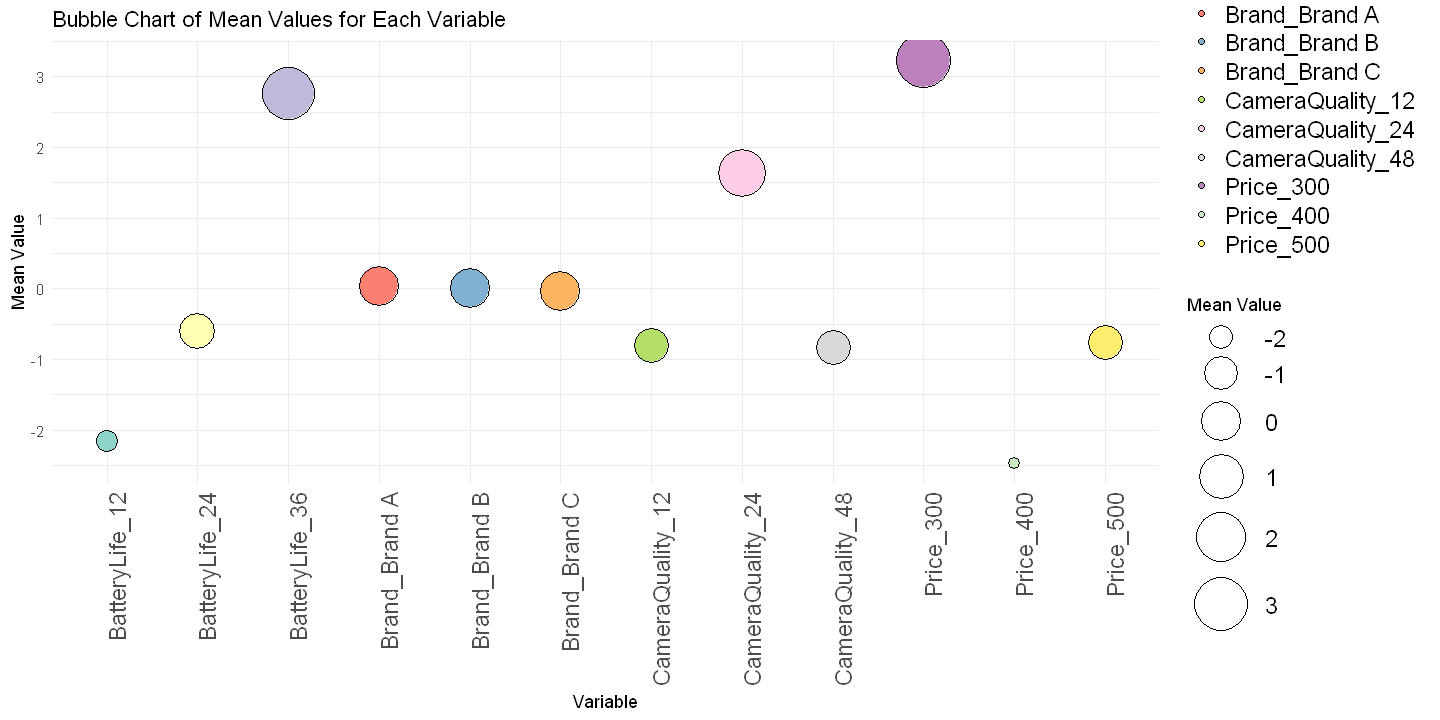

In [43]:
#------------------ Utility Bubble plot -----------------------
ggplot(means_df, aes(x = Variable, y = Mean, size = Mean, fill = Variable)) +
  geom_point(shape = 21, color = "black") +
  scale_size_continuous(range = c(3, 15)) + # Adjust the range of bubble sizes
  labs(title = "Bubble Chart of Mean Values for Each Variable",
       x = "Variable",
       y = "Mean Value",
       size = "Mean Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 14)) +
  theme(legend.text = element_text(size = 14)) +
  scale_fill_brewer(palette = "Set3")  # Add colors to the bubbles